In [1]:
import numpy as np
import scipy.stats as sp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm, ticker
import matplotlib
%matplotlib inline

In [2]:
def p(x,mu,sigma):
    return sp.multivariate_normal.pdf(x, mean=mu, cov=sigma)

def g(c, s, x):
    r = np.array([[c, s], [-s, c]])
    return x @ r

mu = np.array([0, 0])
sigma = np.array([[1, 0], [0, 1]])

def h(c, s, x):
    r = np.array([[c, s], [-s, c]])
    p0 = p(x, mu, sigma)
    p1 = p(x, np.matmul(mu, r), np.matmul(np.transpose(r), np.matmul(sigma, r)))
    return p0/(p0 + p1)
    #return p(x,0.5,1)/(p(x,0.5,1) + abs(c)*p(a+c*x,0.5,1))

In [3]:
N = 10**3
generator = np.random.default_rng()
xx = generator.multivariate_normal(mu, sigma, N)
C = 0
S = 0
range = 2
clow = C-range
chigh = C+range
step = 50
slow = S - range
shigh = S + range
alpha = 5e-4
e = 10**-7

mylosses= np.zeros((step, step))
i = 0
for s in np.linspace(slow,shigh,step):
    losses = np.zeros(step)
    j = 0
    for c in np.linspace(clow, chigh, step):
        yy = np.array(g(1, c, s, xx))
        losses[j] = np.mean(-np.log(e+h(c,s, xx)) - np.log(e+1.-h(c, s, yy))
                            - alpha*np.linalg.norm((g(0, c, s, xx)-xx))**2
                           )
        j += 1
    mylosses[i] = losses
    i += 1

mylosses -= np.max(mylosses)

In [4]:
#SO(2) Symm Numeric
c_i =  np.array([-0.85872316, 0.27211428, 0.47417784, 0.033890486, -0.3676474, -0.032414675, 0.95868134, -0.88895726, 0.55541253, 0.066814184, 0.9156189, 0.23968959, 0.110369205, -0.41880226, -0.6000898, 0.17599916, -0.94826937, -0.35619354, -0.83783174, -0.73127294, 0.015576839, 0.7852292, 0.68911743, -0.24592662, -0.14573264, 0.7662387, -0.9882839, -0.31345367, -0.8961017, 0.5047381, -0.8599014, 0.48989487, 0.47745395, -0.613708, 0.3634274, 0.03619671, -0.010008812, -0.4097674, -0.5603702, 0.36481, -0.69680786, -0.34705496, -0.15202975, 0.3101616, -0.73509216, -0.5344062, 0.30883217, 0.40847063, 0.55465126, 0.26166248])
s_i =  np.array([-0.5189321, 0.866029, 0.6445513, -0.5423987, -0.035024643, -0.43515825, -0.8033035, 0.16639757, 0.42107368, -0.99472547, 0.4849193, 0.40242076, -0.12747884, 0.27021265, 0.73953533, 0.445781, 0.54546213, -0.0374887, -0.14548683, -0.6347649, -0.17163396, 0.7712097, 0.92586255, 0.82638, -0.16464329, -0.35728455, 0.7471318, -0.0992794, 0.67240214, -0.17267084, -0.33840728, -0.96583843, -0.8676381, -0.83500075, -0.9987209, -0.19379497, -0.8067701, -0.7930465, 0.9798639, -0.01678276, 0.18508458, -0.19763541, 0.37501264, -0.52744174, 0.1858542, -0.26234055, 0.9498675, -0.7470887, -0.9433842, -0.70961833])
c_f =  np.array([-0.88252014, 0.35007945, 0.5459049, 0.43158123, -0.7894348, -0.561888, 0.83753264, -0.918048, 0.7131664, 0.054187346, 0.9377555, 0.621933, 0.7300218, -0.785252, -0.7132201, 0.5466395, -0.8663817, -0.76691395, -0.88068783, -0.7602239, 0.625715, 0.6775992, 0.5063598, 1, -0.6749553, 0.82762975, -0.7956622, -0.8320456, -0.8506107, 0.87311816, -0.9318996, 0.32081345, 0.45263708, -0.6231892, 0.2690808, 0.6634984, -0.02042073, -0.495866, -0.43685675, 0.7723736, -0.8797252, -0.8000153, -0.6075473, 0.5544267, -0.89215726, -0.8566057, 0.1399101, 0.51033974, 0.39448696, 0.37740204])
s_f =  np.array([-0.4140745, 0.9531465, 0.8011691, -0.952928, -0.53181624, -0.87729985, -0.64955455, 0.19712651, 0.61955106, -0.9741407, 0.41970333, 0.8287745, -0.7363562, 0.67145777, 0.70672554, 0.7964559, 0.39215437, -0.50300014, -0.29952294, -0.6839135, -0.70687795, 0.8205129, 0.8724242, 0, -0.66082615, -0.43984264, 0.5267547, -0.6823973, 0.49745265, -0.5252861, -0.34067068, -0.8751214, -0.8138984, -0.8661947, -0.9542631, -0.73808974, -1.0334401, -0.80570203, 0.8236893, -0.49234164, 0.40005848, -0.5564053, 0.798653, -0.7840401, 0.3956972, -0.49092066, 0.95210207, -0.8096298, -0.89591753, -0.8349926])

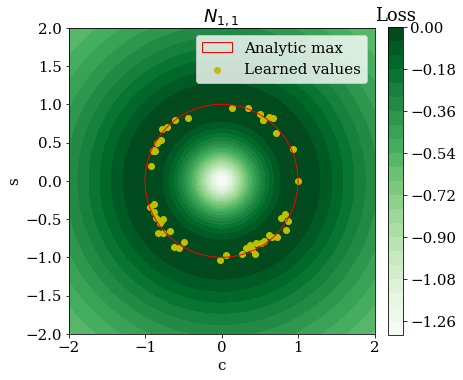

In [6]:
x = np.linspace(clow, chigh, step)
y = np.linspace(slow, shigh, step)
X,Y = np.meshgrid(x,y)
Z = np.array(mylosses)

plt.rc('font', size=15)
plt.rcParams["font.family"] = "serif"



fig, ax = plt.subplots(figsize=(6,6))

ax.set_aspect('equal')
ax.set_xlabel('c')
ax.set_ylabel('s')
cf = ax.contourf(X,Y,Z,25, cmap='Greens')
clb = fig.colorbar(cf, ax=ax, fraction=0.046, pad=0.04)
clb.ax.set_title('Loss')

circ = plt.Circle((0, 0), radius=1, edgecolor='r', facecolor='None', label = "Analytic max")
ax.add_patch(circ)
ax.scatter(c_f, s_f, label = "Learned values", color='y')
plt.legend()
plt.title("$N_{1, 1}$")



plt.savefig("SO2symmAnalytic.pdf",  bbox_inches='tight')

In [ ]:
x = np.linspace(clow, chigh, step)
y = np.linspace(slow, shigh, step)
X,Y = np.meshgrid(x,y)
Z = np.array(mylosses)

plt.rc('font', size=15)
plt.rcParams["font.family"] = "serif"



fig, ax = plt.subplots(figsize=(6,6))

ax.xaxis.label.set_color('white')        #setting up X-axis label color to yellow
ax.yaxis.label.set_color('white')          #setting up Y-axis label color to blue

ax.tick_params(axis='x', colors='white')    #setting up X-axis tick color to red
ax.tick_params(axis='y', colors='white')  #setting up Y-axis tick color to black

ax.spines['left'].set_color('white')        # setting up Y-axis tick color to red
ax.spines['top'].set_color('white')
ax.spines['right'].set_color('white') 
ax.spines['bottom'].set_color('white') 

ax.set_aspect('equal')
ax.set_xlabel('c', c='w')
ax.set_ylabel('s', c='w')
cf = ax.contourf(X,Y,Z,25, cmap='Greens')
clb = fig.colorbar(cf, ax=ax, fraction=0.046, pad=0.04)
clb.ax.set_title('Loss')

circ = plt.Circle((0, 0), radius=1, edgecolor='r', facecolor='None', label = "True maximum")
ax.add_patch(circ)
ax.scatter(c_f, s_f, label = "Learned values", color='y')
plt.legend()
plt.title("$N_{1, 1}$")



#plt.savefig("SO2symmAnalytic.pdf",  bbox_inches='tight')

In [7]:
sigma = [[1, 0],[0, 2]]
N =10 ** 3
generator = np.random.default_rng()
xx = generator.multivariate_normal(mu, sigma, N)
C = 0
S = 0
range = 2
clow = C-range
chigh = C+range
step = 100
slow = S - range
shigh = S + range
alpha = 0
e = 10**-7

mylosses= np.zeros((step, step))
i = 0
for s in np.linspace(slow,shigh,step):
    losses = np.zeros(step)
    j = 0
    for c in np.linspace(clow, chigh, step):
        yy = g(1, c, s, xx)
        losses[j] = np.mean(-np.log(e+h(c,s, xx)) - np.log(e+1.-h(c, s, yy)))
        j += 1
    mylosses[i] = losses
    i += 1
mylosses -= np.max(mylosses)

In [8]:
#SO(2) Asymm Numeric
c_i =  [0.26571512, -0.3945005, 0.44834018, 0.5462165, -0.94836926, 0.23670745, -0.9631424, 0.49777198, 0.059622288, -0.06225252, 0.5462706, -0.6066456, 0.13397312, 0.0998075, 0.7076709, 0.9624219, 0.43074346, -0.1603167, -0.62717533, -0.6902883]
s_i =  [0.9816861, -0.25062108, 0.9110687, -0.48910642, -0.62036824, 0.4152813, 0.21696877, 0.507576, -0.16734147, -0.36346364, -0.23032498, -0.7328994, -0.10310316, 0.0027916431, 0.6895435, 0.91285515, -0.03623557, -0.9383857, -0.5187366, -0.4970281]
s_f =  [-0.0063809827, -0.050858375, -0.023912752, -0.0690209, -0.07821135, 0.09186161, -0.020683106, -0.032206576, -0.059284702, 0.052080724, 0.021130614, -0.043961585, -0.0028533146, -0.038303714, -0.046481118, -0.0006580645, -0.078888625, 0.026181556, -0.02838049, 0.006531654]
c_f =  [0.9991846, -0.9585784, 1.0, -0.9496853, -0.9909553, 1.0, 1.0, 1.0, -0.9719964, -0.9852231, -0.95447344, -0.9609807, -1.0, 0.98924637, 0.99099576, 1.0, -1.0, -1.0, -1.0, -1.0]

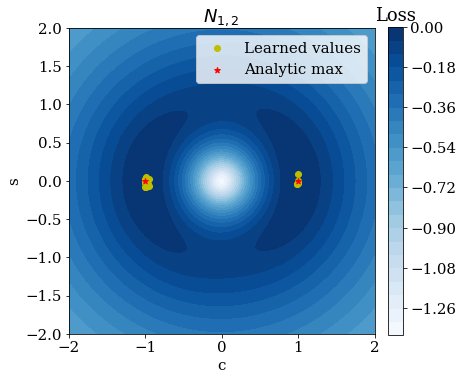

In [9]:
x = np.linspace(clow, chigh, step)
y = np.linspace(slow, shigh, step)
X,Y = np.meshgrid(x,y)
Z = np.array(mylosses)


fig, ax = plt.subplots(figsize=(6,6))


ax.set_aspect('equal')
ax.set_xlabel('c')
ax.set_ylabel('s')
cf = ax.contourf(X,Y,Z,25, cmap='Blues')
clb = fig.colorbar(cf, ax=ax, fraction=0.046, pad=0.04)
clb.ax.set_title('Loss')

ax.scatter(c_f, s_f, label = "Learned values", color='y')
plt.scatter([1, -1], [0, 0], marker='*', c='r', label = "Analytic max")
plt.legend()
plt.title("$N_{1, 2}$")



plt.savefig("4O2asymmAnalytic.pdf", bbox_inches='tight')

In [3]:
from scipy.stats import multivariate_normal

In [4]:
#2d Octagonal
def g(c, s, x):
    r = np.array([[c, s], [-s, c]])
    return x @ r
def h(c, s, x):
    r = np.array([[c, s], [-s, c]])
    p = 1/8*np.sum([multivariate_normal.pdf(x, [np.cos(i*np.pi/4), np.sin(i*np.pi/4)], 0.01*np.identity(2)) for i in np.arange(8)])
    q = 1/8*np.sum([multivariate_normal.pdf(x, [np.cos(i*np.pi/4), np.sin(i*np.pi/4)]@r, 0.01*r.T @ r) for i in np.arange(8)])
    return p/(p+q)

def generate_real_samples(n):
	amounts = np.random.multinomial(n,np.ones(8)/8.)
	X1 = []
	X2 = []
	mycounter = 0
	for i in np.arange(8):
		X1 = np.concatenate([X1,np.random.normal(np.cos(2*i*np.pi/8),0.1,amounts[mycounter])])
		X2 = np.concatenate([X2,np.random.normal(np.sin(2*i*np.pi/8),0.1,amounts[mycounter])])
		mycounter+=1
		pass

	X1 = X1.reshape(n, 1)
	X2 = X2.reshape(n, 1)    
	X = np.hstack((X1, X2))
	np.random.shuffle(X)
	return X

In [5]:
N = 10**3
xx = generate_real_samples(N)
C = 0
S = 0
range = 1.5
clow = C-range
chigh = C+range
step = 50
slow = S - range
shigh = S + range
e = 10**-7

mylosses= np.zeros((step, step))
i = 0
for s in np.linspace(slow,shigh,step):
    losses = np.zeros(step)
    j = 0
    for c in np.linspace(clow, chigh, step):
        yy = np.array(g(c, s, xx))
        losses[j] = np.mean(-np.log(e+h(c,s, xx)) - np.log(e+1.-h(c, s, yy)))
        j += 1
    mylosses[i] = losses
    i += 1

mylosses -= np.max(mylosses)

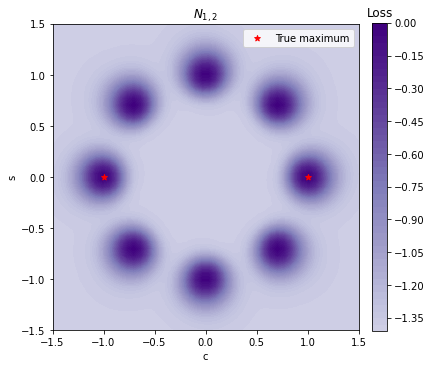

In [6]:
x = np.linspace(clow, chigh, step)
y = np.linspace(slow, shigh, step)
X,Y = np.meshgrid(x,y)
Z = np.array(mylosses)


fig, ax = plt.subplots(figsize=(6,6))


ax.set_aspect('equal')
ax.set_xlabel('c')
ax.set_ylabel('s')
cf = ax.contourf(X,Y,Z,50, cmap='Purples', vmin=-2)
clb = fig.colorbar(cf, ax=ax, fraction=0.046, pad=0.04)
clb.ax.set_title('Loss')

#ax.scatter(c_f, s_f, label = "Learned values", color='y')
plt.scatter([1, -1], [0, 0], marker='*', c='r', label = "True maximum")
plt.legend()
plt.title("$N_{1, 2}$")



#plt.savefig("4O2asymmAnalytic.pdf", bbox_inches='tight')
plt.show()

In [7]:
#2d Octagonal
def g(c, s, x):
    r = np.array([[c, s], [-s, -c]])
    return x @ r
def h(c, s, x):
    r = np.array([[c, s], [-s, -c]])
    p = 1/8*np.sum([multivariate_normal.pdf(x, [np.cos(i*np.pi/4), np.sin(i*np.pi/4)], 0.01*np.identity(2)) for i in np.arange(8)])
    q = 1/8*np.sum([multivariate_normal.pdf(x, [np.cos(i*np.pi/4), np.sin(i*np.pi/4)]@r, 0.01*r.T @ r) for i in np.arange(8)])
    return p/(p+q)

def generate_real_samples(n):
	amounts = np.random.multinomial(n,np.ones(8)/8.)
	X1 = []
	X2 = []
	mycounter = 0
	for i in np.arange(8):
		X1 = np.concatenate([X1,np.random.normal(np.cos(2*i*np.pi/8),0.1,amounts[mycounter])])
		X2 = np.concatenate([X2,np.random.normal(np.sin(2*i*np.pi/8),0.1,amounts[mycounter])])
		mycounter+=1
		pass

	X1 = X1.reshape(n, 1)
	X2 = X2.reshape(n, 1)    
	X = np.hstack((X1, X2))
	np.random.shuffle(X)
	return X

In [9]:
N = 10**3
xx = generate_real_samples(N)
C = 0
S = 0
range = 1.5
clow = C-range
chigh = C+range
step = 50
slow = S - range
shigh = S + range
e = 10**-7

mylosses= np.zeros((step, step))
i = 0
for s in np.linspace(slow,shigh,step):
    losses = np.zeros(step)
    j = 0
    for c in np.linspace(clow, chigh, step):
        yy = np.array(g(c, s, xx))
        losses[j] = np.mean(-np.log(e+h(c,s, xx)) - np.log(e+1.-h(c, s, yy)))
        j += 1
    mylosses[i] = losses
    i += 1

mylosses -= np.max(mylosses)

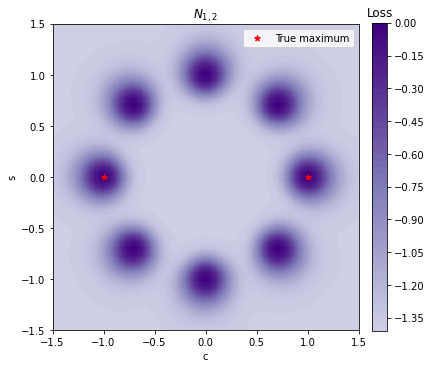

In [10]:
x = np.linspace(clow, chigh, step)
y = np.linspace(slow, shigh, step)
X,Y = np.meshgrid(x,y)
Z = np.array(mylosses)


fig, ax = plt.subplots(figsize=(6,6))


ax.set_aspect('equal')
ax.set_xlabel('c')
ax.set_ylabel('s')
cf = ax.contourf(X,Y,Z,50, cmap='Purples', vmin=-2)
clb = fig.colorbar(cf, ax=ax, fraction=0.046, pad=0.04)
clb.ax.set_title('Loss')

#ax.scatter(c_f, s_f, label = "Learned values", color='y')
plt.scatter([1, -1], [0, 0], marker='*', c='r', label = "True maximum")
plt.legend()
plt.title("$N_{1, 2}$")



#plt.savefig("4O2asymmAnalytic.pdf", bbox_inches='tight')
plt.show()